This project uses data from https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018

# __Importing the required libraries and functions__

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# __Reading the dataset into Jupyter Notebook and basic info of the dataset__

In [43]:
#Reading dataset into python using pandas
transfers= pd.read_csv('Data_2010-2018.csv')

In [44]:
#Top 20 values in the dataset
transfers.head(20)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Fernando Torres,Centre-Forward,26,Liverpool,Premier League,Chelsea,Premier League,2010-2011,50000000.0,58500000
1,Andy Carroll,Centre-Forward,22,Newcastle,Premier League,Liverpool,Premier League,2010-2011,2500000.0,41000000
2,David Villa,Centre-Forward,28,Valencia CF,LaLiga,FC Barcelona,LaLiga,2010-2011,45000000.0,40000000
3,Edin Dzeko,Centre-Forward,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2010-2011,30000000.0,37000000
4,Ángel Di María,Right Winger,22,Benfica,Liga NOS,Real Madrid,LaLiga,2010-2011,9500000.0,33000000
5,Yaya Touré,Central Midfield,27,FC Barcelona,LaLiga,Man City,Premier League,2010-2011,18000000.0,30000000
6,Mario Balotelli,Centre-Forward,20,Inter,Serie A,Man City,Premier League,2010-2011,26000000.0,29500000
7,David Silva,Attacking Midfield,24,Valencia CF,LaLiga,Man City,Premier League,2010-2011,32000000.0,28750000
8,Luis Suárez,Centre-Forward,24,AFC Ajax,Eredivisie,Liverpool,Premier League,2010-2011,25000000.0,26500000
9,David Luiz,Centre-Back,23,Benfica,Liga NOS,Chelsea,Premier League,2010-2011,14000000.0,25000000


In [45]:
#Shape of the dataset (rows, columns)
transfers.shape

(2225, 10)

In [46]:
#Types of data in each column
transfers.dtypes

Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee      int64
dtype: object

In [47]:
transfers.index

RangeIndex(start=0, stop=2225, step=1)

# __Modifying the season column into int for plotting__

In [48]:
#Unique values in the season columns represent the year of season start
season=transfers['Season'].unique()
print(season)

['2010-2011' '2011-2012' '2012-2013' '2013-2014' '2014-2015' '2015-2016'
 '2016-2017' '2017-2018' '2018-2019']


In [49]:
#Defining a function which contains dictionary to change season values into single year int values
def season_rename(season):
    year_dict = {'2010-2011':2010,
                '2011-2012':2011,
                 '2012-2013':2012,
                 '2013-2014':2013,
                 '2014-2015':2014,
                 '2015-2016':2015,
                 '2016-2017':2016,
                 '2017-2018':2017,
                 '2018-2019':2018,
                }

    return year_dict[season]
   

In [50]:
#Applying the function into the dataset
transfers['Season'] = transfers['Season'].apply(season_rename)

In [51]:
#Dataset with modified values
transfers.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Fernando Torres,Centre-Forward,26,Liverpool,Premier League,Chelsea,Premier League,2010,50000000.0,58500000
1,Andy Carroll,Centre-Forward,22,Newcastle,Premier League,Liverpool,Premier League,2010,2500000.0,41000000
2,David Villa,Centre-Forward,28,Valencia CF,LaLiga,FC Barcelona,LaLiga,2010,45000000.0,40000000
3,Edin Dzeko,Centre-Forward,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2010,30000000.0,37000000
4,Ángel Di María,Right Winger,22,Benfica,Liga NOS,Real Madrid,LaLiga,2010,9500000.0,33000000
5,Yaya Touré,Central Midfield,27,FC Barcelona,LaLiga,Man City,Premier League,2010,18000000.0,30000000
6,Mario Balotelli,Centre-Forward,20,Inter,Serie A,Man City,Premier League,2010,26000000.0,29500000
7,David Silva,Attacking Midfield,24,Valencia CF,LaLiga,Man City,Premier League,2010,32000000.0,28750000
8,Luis Suárez,Centre-Forward,24,AFC Ajax,Eredivisie,Liverpool,Premier League,2010,25000000.0,26500000
9,David Luiz,Centre-Back,23,Benfica,Liga NOS,Chelsea,Premier League,2010,14000000.0,25000000


# __Creating Market_value_million and Transfer_fee_million columns using float for simpler visualisation__

In [52]:
transfers['Transfer_fee_million']=transfers['Transfer_fee'].apply(lambda x :float(x/1000000))

In [53]:
transfers['Market_value_million']=transfers['Market_value'].apply(lambda x :float(x/1000000))

In [54]:
transfers.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Transfer_fee_million,Market_value_million
0,Fernando Torres,Centre-Forward,26,Liverpool,Premier League,Chelsea,Premier League,2010,50000000.0,58500000,58.5,50.0
1,Andy Carroll,Centre-Forward,22,Newcastle,Premier League,Liverpool,Premier League,2010,2500000.0,41000000,41.0,2.5
2,David Villa,Centre-Forward,28,Valencia CF,LaLiga,FC Barcelona,LaLiga,2010,45000000.0,40000000,40.0,45.0
3,Edin Dzeko,Centre-Forward,24,VfL Wolfsburg,1.Bundesliga,Man City,Premier League,2010,30000000.0,37000000,37.0,30.0
4,Ángel Di María,Right Winger,22,Benfica,Liga NOS,Real Madrid,LaLiga,2010,9500000.0,33000000,33.0,9.5


# __Removing unwanted data__

In [55]:
transfers.isnull().sum()

Name                     0
Position                 0
Age                      0
Team_from                0
League_from              0
Team_to                  0
League_to                0
Season                   0
Market_value            17
Transfer_fee             0
Transfer_fee_million     0
Market_value_million    17
dtype: int64

In [56]:
transfers["Team_to"].loc[transfers["League_to"] == 'Premier League'].unique()

array(['Chelsea', 'Liverpool', 'Man City', 'Aston Villa', 'Sunderland',
       'Arsenal', 'Spurs', 'Stoke City', 'Man Utd', 'Wolves',
       'Birmingham', 'Fulham', 'Newcastle', 'West Ham', 'Wigan',
       'Blackburn', 'West Brom', 'Everton', 'QPR', 'Bolton', 'Swansea',
       'Norwich', 'Southampton', 'Reading', 'Cardiff', 'Hull City',
       'Crystal Palace', 'Leicester', 'Bournemouth', 'Watford', 'Burnley',
       'Middlesbrough', 'Brighton', 'Huddersfield', 'Pyramids FC'],
      dtype=object)

In [57]:
#Unwanted data
f=transfers.loc[transfers["Team_to"] == 'Pyramids FC']
f

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Transfer_fee_million,Market_value_million
2104,Keno,Left Winger,28,Palmeiras,Série A,Pyramids FC,Premier League,2018,3500000.0,8600000,8.6,3.5
2188,Carlos Eduardo,Right Winger,21,Goiás EC,Série B,Pyramids FC,Premier League,2018,2500000.0,5200000,5.2,2.5
2191,Rodriguinho,Attacking Midfield,30,Corinthians,Série A,Pyramids FC,Premier League,2018,6000000.0,5100000,5.1,6.0


In [58]:
#dropping unwanted data
transfers.drop([2104,2188,2191], inplace = True)

## __Some visualisations of the data in plotted form__

<AxesSubplot:xlabel='Position'>

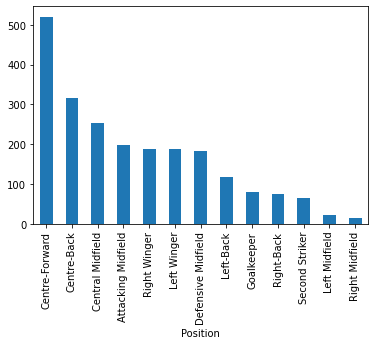

In [59]:
#Number of transferred players according to position
transfers.value_counts('Position').plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

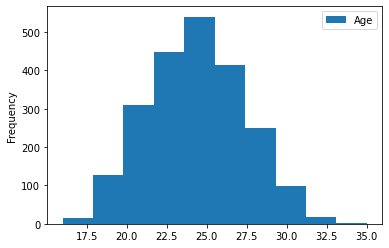

In [60]:
#Distribution of players according to age
transfers[['Age']].plot(kind='hist',bins=10)

In [65]:
transfers['Age'].describe()

count    2222.000000
mean       24.299280
std         3.169813
min        16.000000
25%        22.000000
50%        24.000000
75%        27.000000
max        35.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='League_from,League_to'>

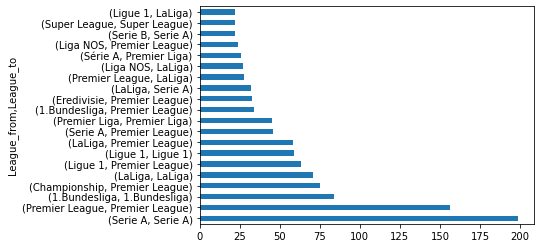

In [61]:
#Bar chart plotting the amount of transfers between leagues
transfers[['League_from','League_to']].value_counts().head(20).plot(kind= 'barh')

<AxesSubplot:ylabel='Team_from,Team_to'>

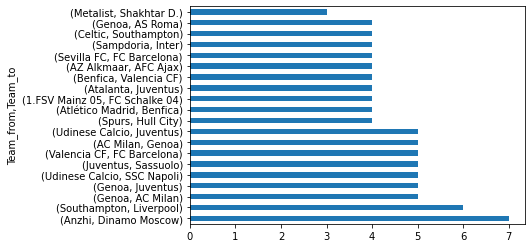

In [62]:
#Bar chart plotting the amount of transfers between teams
transfers[['Team_from','Team_to']].value_counts().head(20).plot(kind= 'barh')

In [63]:
#Highest fee paid by teams arranged by descending transfer fee
transfers[['Team_to','Transfer_fee']].groupby('Team_to').max().sort_values('Transfer_fee',ascending=False).head(10)#.plot(kind='line')

,Transfer_fee
Team_to,
Paris SG,222000000
FC Barcelona,125000000
Juventus,117000000
Man Utd,105000000
Real Madrid,101000000
Liverpool,78800000
Man City,76000000
Atlético Madrid,70000000
Chelsea,66000000


<AxesSubplot:xlabel='Market_value_million', ylabel='Transfer_fee_million'>

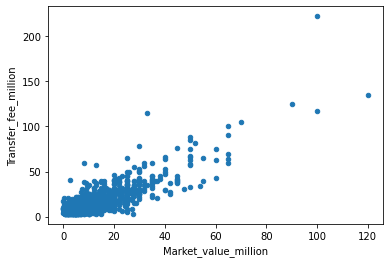

In [70]:
#Scatter plot of transfer fees paid each season
transfers.plot(y='Transfer_fee_million',x='Market_value_million',kind='scatter')

Text(0, 0.5, 'Transfer Fee (million Euros) ')

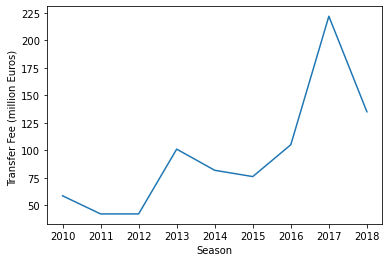

In [485]:
#Line graph of the highest transer fee for each season
transfers.groupby('Season')['Transfer_fee_million'].max().plot(kind='line')
plt.ylabel('Transfer Fee (million Euros) ')

In [67]:
transfers["Transfer_fee_million"].describe()

count    2222.000000
mean       12.357228
std        12.647599
min         3.000000
25%         6.000000
50%         8.400000
75%        14.000000
max       222.000000
Name: Transfer_fee_million, dtype: float64

# __Getting user data for data visualisation and plotting__

In [68]:
#Function to display various analysed values of data set such as mean and max values
def data (league_team, name):
    values = transfers.loc[transfers[league_team] == name]
    avg = values['Transfer_fee_million'].sum()/len(transfers.loc[transfers[league_team] == name])
    max_value = values['Transfer_fee_million'].max()
    min_value = values['Transfer_fee_million'].min()
    median_value = values['Transfer_fee_million'].median()
    print ("These are the values for", name)
    print ("These are the players transferred arranged by descending transfer value:")
    print (transfers.loc[transfers[league_team] == name].sort_values('Transfer_fee',ascending = False)["Name"].unique())
    print ('The number of players transfered is: ', transfers.loc[transfers[league_team] == name].sort_values('Transfer_fee',ascending = False)["Name"].nunique())
    print ("The average transfer fee per player is:", avg ,"Million Euros")
    print ("The highest transfer fee paid is:",max_value,'Million Euros' )
    print ("The lowest transfer fee paid is:",min_value,'Million Euros' )
    print ('The median transfer fee paid is:', median_value,'Million Euros')

#Getting user input, using a loop to check for unwanted inputs, and calling the function
user_in = int(input("Enter a number from the list\n1:League from\n2:League to\n3:Team from\n4:Team to\n"))

if user_in == 1:
    league_team = 'League_from'
    name = input('Enter the name of the league')
    data(league_team,name)
elif user_in == 2:
    league_team = 'League_to'
    name = input('Enter the name of the league')
    data(league_team,name)
elif user_in == 3:
    league_team = 'Team_from'
    name = input('Enter the name of the team')
    data(league_team,name)
elif user_in == 4:
    league_team = 'Team_to'
    name = input('Enter the name of the team')
    data(league_team,name)
else:
    print("Invalid number")


Enter a number from the list
1:League from
2:League to
3:Team from
4:Team to
4
Enter the name of the teamReal Madrid
These are the values for Real Madrid
These are the players transferred arranged by descending transfer value:
['Gareth Bale' 'James Rodríguez' 'Vinícius Júnior' 'Ángel Di María'
 'Asier Illarramendi' 'Danilo' 'Mateo Kovacic' 'Luka Modric'
 'Álvaro Morata' 'Álvaro Odriozola' 'Fábio Coentrão' 'Isco' 'Toni Kroos'
 'Theo Hernández' 'Mesut Özil' 'Dani Ceballos' 'Sami Khedira'
 'Lucas Silva' 'Raphaël Varane' 'Nuri Sahin' 'Pedro León' 'Keylor Navas'
 'Andriy Lunin' 'Ricardo Carvalho' 'Daniel Carvajal' 'Kiko Casilla'
 'Casemiro' 'Sergio Canales' 'José Callejón']
The number of players transfered is:  29
The average transfer fee per player is: 23.96551724137931 Million Euros
The highest transfer fee paid is: 101.0 Million Euros
The lowest transfer fee paid is: 5.0 Million Euros
The median transfer fee paid is: 18.0 Million Euros


Please enter a column for x-axis: Season
Please enter a column for y-axis: Transfer_fee_million
Please enter a plot type (line, bar, hist, or scatter): line
Choose from one of these numbers
0: exit
1: max values
2: mean values
3: min values:
 1
Thank you for participating!!


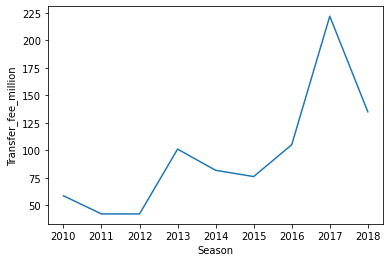

In [69]:
#Function to plot graphs from dataset. Getting kwargs from user to choose which data to plot
def plotting (x_plot,y_plot,plot_type):
        if plot_type == 'scatter':
            transfers.plot(y=y_axis,x=x_axis,kind=plot_type)
        elif plot_type == 'bar' or plot_type == 'barh':
            transfers[[x_plot,y_plot]].value_counts().head(20).plot(kind= plot_type)
            plt.xlabel(x_plot)
            plt.ylabel(y_plot)
        elif plot_type == 'line':
            num_in= int(input("Choose from one of these numbers\n0: exit\n1: max values\n2: mean values\n3: min values:\n "))
            if num_in >= 1 and num_in <=3:
                while num_in!=0:
                    if num_in == 1:
                        transfers.groupby(x_plot)[y_plot].max().plot(kind=plot_type)
                        plt.xlabel(x_plot)
                        plt.ylabel(y_plot)
                        num_in = 0 
                    elif num_in == 2:
                        transfers.groupby(x_plot)[y_plot].mean().plot(kind=plot_type)
                        plt.xlabel(x_plot)
                        plt.ylabel(y_plot)
                        num_in = 0
                    elif num_in == 3:
                        transfers.groupby(x_plot)[y_plot].min().plot(kind=plot_type)
                        plt.xlabel(x_plot)
                        plt.ylabel(y_plot)
                        num_in = 0
                    else:
                        num_in = input("Enter 1 to continue or 0 to exit: ") 
            else:
                print("Invalid number")
        else:
            print("Invalid plot type")

        print("Thank you for participating!!")

#Getting user inputs and calling functions        
x_axis = input("Please enter a column for x-axis: ")
y_axis = input ("Please enter a column for y-axis: ")
plot_type = input("Please enter a plot type (line, bar, hist, or scatter): ")    
plotting(x_axis,y_axis,plot_type) 
            



In [ ]:
num = 1
while num !=0:
    num_in= input("Choose from one of these numbers\n0: exit\n1: max values\n2: mean values\n3: min values: ")
        #while num !=0
    if num_in == '1':
        #transfers.groupby(x_plot)[y_plot].max().plot(kind=plot_type)
        print("oK")
        num = 0 
    elif num_in == '2':
        #transfers.groupby(x_plot)[y_plot].mean().plot(kind=plot_type)
        print("OK2")
        num = 0
    elif num_in == '3':
        print("OK3")
        #transfers.groupby(x_plot)[y_plot].min().plot(kind=plot_type)
        num = 0
    else:
        print("Please enter a valid number")
